In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv('HealtyNormalized.csv')
# Importing the dataset
X['Fault'] = 0

y = pd.read_csv('combinedFault.csv')
y['Fault'] = 1


In [3]:
X.head(), y.head()

(        vsH       vbH  Fault
 0  0.000998 -0.000217      0
 1  0.001001 -0.000185      0
 2  0.001002 -0.000152      0
 3  0.001007 -0.000185      0
 4  0.001010 -0.000217      0,
         vsC       vbC  Fault
 0  0.039634  0.018847      1
 1  0.039634  0.018847      1
 2  0.039634  0.018518      1
 3  3.632150  0.015887      1
 4  4.148328  0.018518      1)

In [4]:
X = X.rename(columns={"vsH": "speed", "vbH": "vibration"})
y = y.rename(columns={"vsC": "speed", "vbC": "vibration"})

In [5]:
X.head(), y.head()

(      speed  vibration  Fault
 0  0.000998  -0.000217      0
 1  0.001001  -0.000185      0
 2  0.001002  -0.000152      0
 3  0.001007  -0.000185      0
 4  0.001010  -0.000217      0,
       speed  vibration  Fault
 0  0.039634   0.018847      1
 1  0.039634   0.018847      1
 2  0.039634   0.018518      1
 3  3.632150   0.015887      1
 4  4.148328   0.018518      1)

In [6]:
import seaborn as sb 
from pylab import rcParams

In [7]:
"""

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
plt.rcParams['agg.path.chunksize'] = 20000000
"""

"\n\n%matplotlib inline\nrcParams['figure.figsize'] = 5,4\nsb.set_style('whitegrid')\nplt.rcParams['agg.path.chunksize'] = 20000000\n"

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

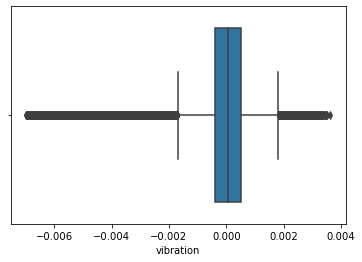

In [8]:
sb.boxplot(X['vibration'])

In [9]:
def find_normal_boundaries(df, variable):    
    # calculate the boundaries outside which lie the outliers for a Gaussian distribution    
    upper_boundary = df[variable].mean() + 10 * df[variable].std()
    lower_boundary = df[variable].mean() - 10 * df[variable].std()    
    return upper_boundary, lower_boundary


In [10]:
upper_boundary, lower_boundary = find_normal_boundaries(X, 'vibration')
print(upper_boundary, lower_boundary)

0.0071039730976409105 -0.0070003626852839


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

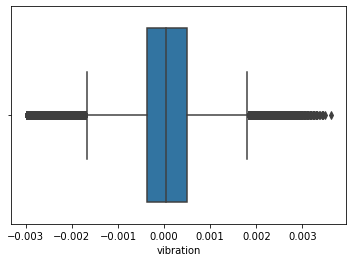

In [11]:
upper_boundary = 0.007
lower_boundary = -0.003

data2 = X[(X['vibration']<upper_boundary) & (X['vibration']>lower_boundary)]

X = data2
X.describe()

sb.boxplot(X['vibration'])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

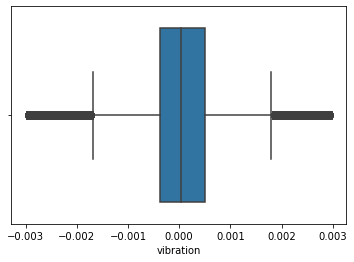

In [12]:
upper_boundary = 0.003
lower_boundary = -0.003

data2 = X[(X['vibration']<upper_boundary) & (X['vibration']>lower_boundary)]

X = data2
X.describe()

sb.boxplot(X['vibration'])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

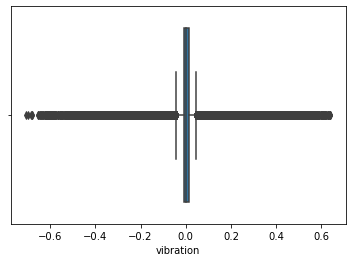

In [13]:
sb.boxplot(y['vibration'])

In [14]:
upper_boundary, lower_boundary = find_normal_boundaries(y, 'vibration')
print(upper_boundary, lower_boundary)

0.3326969678558227 -0.3299069979161344


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

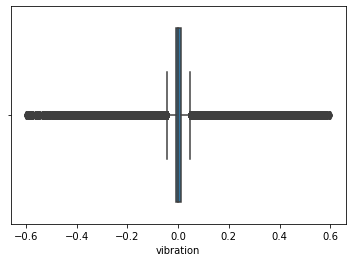

In [15]:
upper_boundary = 0.6
lower_boundary = -0.6

data2 = y[(y['vibration']<upper_boundary) & (y['vibration']>lower_boundary)]

y = data2
y.describe()

sb.boxplot(y['vibration'])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.3, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.3, random_state = 0)

In [17]:
train = X_train.append(y_train)
train

,speed,vibration,Fault
1249031,0.000029,0.000921,0
87884,0.000009,0.000433,0
1199870,0.000009,0.000530,0
588670,0.000943,0.000823,0
813455,0.000012,-0.000087,0
...,...,...,...
152315,4.231508,0.008324,1
963398,0.039634,0.023451,1
117952,0.041935,-0.019957,1
1484420,0.039305,0.007666,1


In [18]:
test = X_test.append(y_test)
test

,speed,vibration,Fault
1456698,0.000009,-0.000575,0
1704724,0.000009,-0.000022,0
850351,0.000990,0.000465,0
1821345,0.001003,0.001083,0
892141,0.000009,-0.000055,0
...,...,...,...
119428,4.209480,-0.002199,1
272203,0.039305,-0.007461,1
1425706,0.039305,-0.000884,1
32487,0.039305,0.015229,1


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [20]:
train.shape

(2720785, 3)

In [21]:
test.shape

(1166052, 3)

In [22]:
train = train.values.reshape(-1, 1, 3)

In [23]:
test  = test.values.reshape(-1, 1, 3)

In [24]:
#pip install keras
train.shape

(2720785, 1, 3)

In [25]:
test.shape

(1166052, 1, 3)

In [26]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

In [27]:
""" # Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()"""

" # Input layer:\nmodel=Sequential([\n    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),\n    Dropout(0.2),\n    RepeatVector(train.shape[1]),\n    LSTM(32, activation='relu', return_sequences=True),\n    Dropout(0.2),\n    TimeDistributed(Dense(train.shape[2]))\n])\n\nmodel.compile(loss='mse',optimizer='adam', metrics=['accuracy'])\nmodel.summary()"

In [28]:
# Input layer:
model=Sequential([
    LSTM(10, activation='relu', input_shape=(train.shape[1],train.shape[2]),use_bias = True , bias_initializer = 'zeros'),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(10, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                560       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 10)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 10)             840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 3)              33        
Total params: 1,433
Trainable params: 1,433
Non-trainable params: 0
______________________________________________________

In [29]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=50
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Epoch 1/100
2449/2449 [==============================] - 6s 2ms/step - loss: 0.0313 - accuracy: 0.9051 - val_loss: 0.0085 - val_accuracy: 0.9995
Epoch 2/100
2449/2449 [==============================] - 5s 2ms/step - loss: 0.0108 - accuracy: 0.9246 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 3/100
2449/2449 [==============================] - 5s 2ms/step - loss: 0.0095 - accuracy: 0.9291 - val_loss: 0.0014 - val_accuracy: 0.9995
Epoch 4/100
2449/2449 [==============================] - 5s 2ms/step - loss: 0.0093 - accuracy: 0.9292 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 5/100
2449/2449 [==============================] - 5s 2ms/step - loss: 0.0093 - accuracy: 0.9304 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 6/100
2449/2449 [==============================] - 6s 2ms/step - loss: 0.0092 - accuracy: 0.9312 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 7/100
2449/2449 [==============================] - 6s 2ms/step - loss: 0.0091 - accuracy: 0.9318 - val_loss: 0.0013 - val_ac

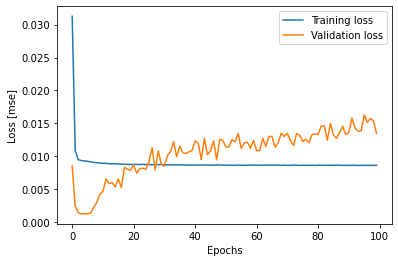

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss [mse]')
plt.show()

In [31]:
pred_train = model.predict(train)

In [32]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


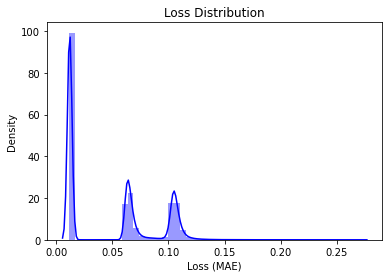

In [33]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [34]:
TH = 0.1
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [35]:
scored_train['Loss_mae'].mean()

0.04783799553798772

Text(0, 0.5, 'Loss (MAE)')

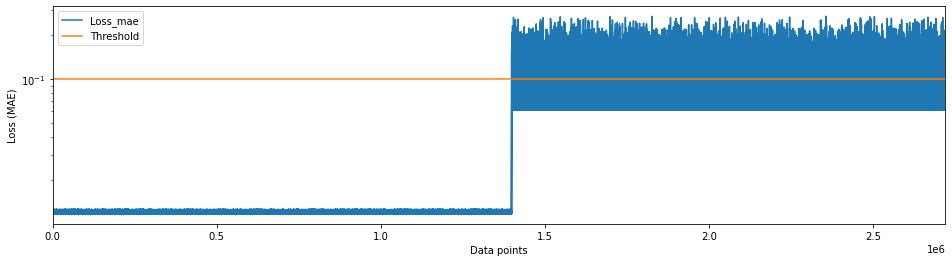

In [36]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [37]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.011978,0.1,False
1,0.011844,0.1,False
2,0.011871,0.1,False
3,0.011879,0.1,False
4,0.011894,0.1,False
...,...,...,...
2720780,0.103734,0.1,True
2720781,0.067269,0.1,False
2720782,0.067820,0.1,False
2720783,0.062876,0.1,False


In [38]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

         Loss_mae  Threshold  Anomaly
1398362  0.104312        0.1     True
1398367  0.104816        0.1     True
1398368  0.110320        0.1     True
1398372  0.103298        0.1     True
1398373  0.105793        0.1     True
...           ...        ...      ...
2720765  0.117288        0.1     True
2720767  0.103666        0.1     True
2720770  0.101955        0.1     True
2720773  0.103496        0.1     True
2720780  0.103734        0.1     True

[605320 rows x 3 columns]
(605320, 3)


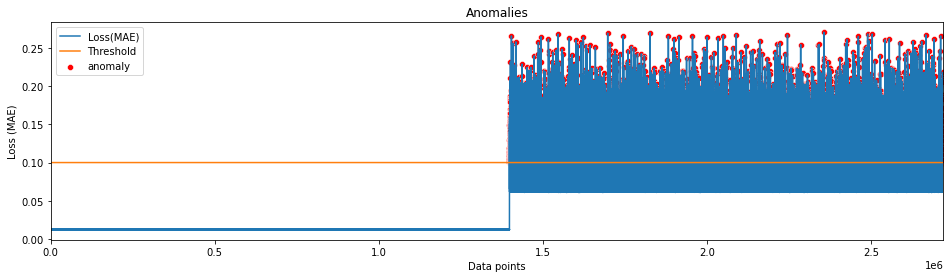

In [39]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [40]:
pred_test = model.predict(test)

In [41]:
score = model.evaluate(test,test)
score

36440/36440 [==============================] - 19s 514us/step - loss: 0.0067 - accuracy: 0.9998


[0.006703349761664867, 0.9997598528862]

In [42]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


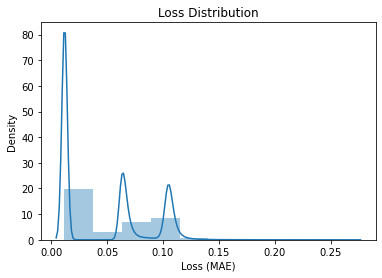

In [43]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [44]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.012030,0.1,False
1,0.011876,0.1,False
2,0.011776,0.1,False
3,0.011947,0.1,False
4,0.011885,0.1,False
...,...,...,...
1166047,0.104620,0.1,True
1166048,0.064336,0.1,False
1166049,0.062511,0.1,False
1166050,0.064980,0.1,False


In [45]:
scored_test['Loss_mae'].mean()

0.047839588440621736

Text(0, 0.5, 'Loss (MAE)')

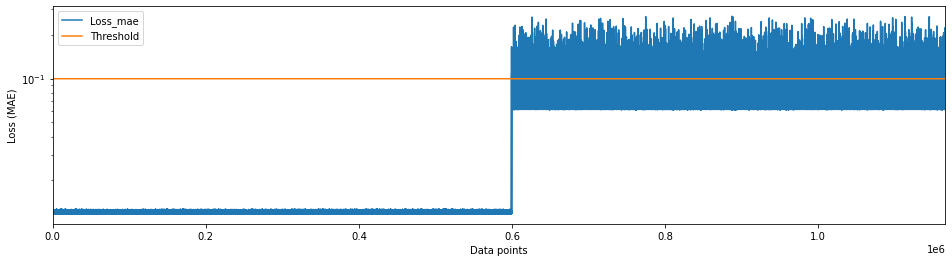

In [46]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [47]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

         Loss_mae  Threshold  Anomaly
599297   0.105243        0.1     True
599301   0.106186        0.1     True
599304   0.165941        0.1     True
599305   0.103633        0.1     True
599306   0.112429        0.1     True
...           ...        ...      ...
1166034  0.103492        0.1     True
1166039  0.103224        0.1     True
1166045  0.120197        0.1     True
1166047  0.104620        0.1     True
1166051  0.110341        0.1     True

[259548 rows x 3 columns]
(259548, 3)


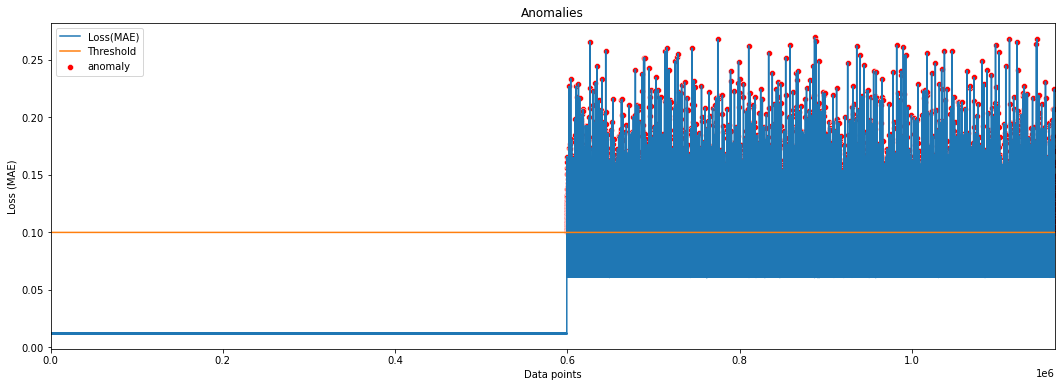

In [48]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [49]:
print(score[1])

0.9997598528862


In [50]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 99.98%


In [51]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 259548


In [52]:
# Seperating Normal and Faulty dataset
x = scored_test['Anomaly'].count() / 2

In [53]:
normal_test = scored_test[scored_test.index < x]
normal_test

,Loss_mae,Threshold,Anomaly
0,0.012030,0.1,False
1,0.011876,0.1,False
2,0.011776,0.1,False
3,0.011947,0.1,False
4,0.011885,0.1,False
...,...,...,...
583021,0.011912,0.1,False
583022,0.011979,0.1,False
583023,0.012093,0.1,False
583024,0.011871,0.1,False


In [54]:
IR_test = scored_test[scored_test.index >= x]
IR_test

,Loss_mae,Threshold,Anomaly
583026,0.011799,0.1,False
583027,0.011907,0.1,False
583028,0.012075,0.1,False
583029,0.012193,0.1,False
583030,0.011891,0.1,False
...,...,...,...
1166047,0.104620,0.1,True
1166048,0.064336,0.1,False
1166049,0.062511,0.1,False
1166050,0.064980,0.1,False


In [55]:
TP = normal_test[normal_test['Anomaly'] == False]
TP = TP['Anomaly'].count()
print("True Positives: {}".format(TP))

FP = normal_test[normal_test['Anomaly'] == True]
FP = FP['Anomaly'].count()
print("False Positives: {}".format(FP))

TN = IR_test[IR_test['Anomaly'] == True]
TN = TN['Anomaly'].count()
print("True Negatives: {}".format(TN))

FN = IR_test[IR_test['Anomaly'] == False]
FN = FN['Anomaly'].count()
print("False Negatives: {}".format(FN))

True Positives: 583026
False Positives: 0
True Negatives: 259548
False Negatives: 323478


In [56]:
Precision = TP / (TP + FP)
print("Precision: {:.2f}%".format(Precision*100))

Recall = TP / (TP + FN)
print("Recall: {:.3f}%".format(Recall*100))

F1Score = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: {:.2f}%".format(F1Score*100))

Accuracy = ( TP + TN ) / ( TP + TN + FN + FP )
print("Accuracy: {:.2f}%".format(Accuracy*100))

Precision: 100.00%
Recall: 64.316%
F1 Score: 78.28%
Accuracy: 72.26%
